# Prediction of Live or Death for Hepatitis Patient 

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
Dataset link: https://archive.ics.uci.edu/ml/datasets/Hepatitis
data = pd.read_csv('hepatitis.data', header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [3]:
data.shape

(155, 20)

In [4]:
# Our dataset don't have attributes names, Lets give them
data.rename(columns={
     0 :'Class',
     1: 'AGE',
     2: 'SEX',
     3: 'STEROID',
     4: 'ANTIVIRALS',
     5: 'FATIGUE',
     6: 'MALAISE',
     7: 'ANOREXIA',
     8: 'LIVER_BIG',
    9: 'LIVER_FIRM',
    10:'SPLEEN_PALPABLE',
    11:'SPIDERS',
    12: 'ASCITES',
    13: 'VARICES',
    14: 'BILIRUBIN',
    15: 'ALK_PHOSPHATE0',
    16: 'SGOT',
    17: 'ALBUMIN',
    18: 'PROTIME',
    19: 'HISTOLOGY'
}, inplace=True)

In [5]:
data

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE0,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


Attribute Information

     1. Class: DIE, LIVE
     2. AGE: 10, 20, 30, 40, 50, 60, 70, 80
     3. SEX: male, female
     4. STEROID: no, yes
     5. ANTIVIRALS: no, yes
     6. FATIGUE: no, yes
     7. MALAISE: no, yes
     8. ANOREXIA: no, yes
     9. LIVER BIG: no, yes
    10. LIVER FIRM: no, yes
    11. SPLEEN PALPABLE: no, yes
    12. SPIDERS: no, yes
    13. ASCITES: no, yes
    14. VARICES: no, yes
    15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
    16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
    17. SGOT: 13, 100, 200, 300, 400, 500, 
    18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
    19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
    20. HISTOLOGY: no, yes

Class is the target variable: DIE = 1, LIVE = 2

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            155 non-null    int64 
 1   AGE              155 non-null    int64 
 2   SEX              155 non-null    int64 
 3   STEROID          155 non-null    object
 4   ANTIVIRALS       155 non-null    int64 
 5   FATIGUE          155 non-null    object
 6   MALAISE          155 non-null    object
 7   ANOREXIA         155 non-null    object
 8   LIVER_BIG        155 non-null    object
 9   LIVER_FIRM       155 non-null    object
 10  SPLEEN_PALPABLE  155 non-null    object
 11  SPIDERS          155 non-null    object
 12  ASCITES          155 non-null    object
 13  VARICES          155 non-null    object
 14  BILIRUBIN        155 non-null    object
 15  ALK_PHOSPHATE0   155 non-null    object
 16  SGOT             155 non-null    object
 17  ALBUMIN          155 non-null    ob

In [7]:
data.describe().T
# Lot of '?' are there in the data, We need to treat that

,count,mean,std,min,25%,50%,75%,max
Class,155.0,1.793548,0.406070,1.0,2.0,2.0,2.0,2.0
AGE,155.0,41.200000,12.565878,7.0,32.0,39.0,50.0,78.0
SEX,155.0,1.103226,0.305240,1.0,1.0,1.0,1.0,2.0
ANTIVIRALS,155.0,1.845161,0.362923,1.0,2.0,2.0,2.0,2.0
HISTOLOGY,155.0,1.451613,0.499266,1.0,1.0,1.0,2.0,2.0


### Data Cleaning

In [8]:
data.isnull().sum()

Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER_BIG          0
LIVER_FIRM         0
SPLEEN_PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK_PHOSPHATE0     0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64

In [85]:
data.duplicated().sum()

0

In [9]:
# Treating '?' values
data.replace("?", np.nan, inplace=True)

In [10]:
data.isnull().sum()

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER_BIG          10
LIVER_FIRM         11
SPLEEN_PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           6
ALK_PHOSPHATE0     29
SGOT                4
ALBUMIN            16
PROTIME            67
HISTOLOGY           0
dtype: int64

In [87]:
# This is medical data, inorder to keep the accuracy  we cant drop the null values,\n
# Lets impute the values on the null spaces - implementing iterative imputing

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [12]:
data.iloc[:,:] = IterativeImputer().fit_transform(data)

In [13]:
data.isnull().sum()

Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER_BIG          0
LIVER_FIRM         0
SPLEEN_PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK_PHOSPHATE0     0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64

In [14]:
data.describe().T
# Now all the attributes came in the description

,count,mean,std,min,25%,50%,75%,max
Class,155.0,1.793548,0.406070,1.0,2.000000,2.000000,2.0,2.000000
AGE,155.0,41.200000,12.565878,7.0,32.000000,39.000000,50.0,78.000000
SEX,155.0,1.103226,0.305240,1.0,1.000000,1.000000,1.0,2.000000
STEROID,155.0,1.506703,0.499965,1.0,1.000000,2.000000,2.0,2.000000
ANTIVIRALS,155.0,1.845161,0.362923,1.0,2.000000,2.000000,2.0,2.000000
FATIGUE,155.0,1.350937,0.477187,1.0,1.000000,1.000000,2.0,2.000000
MALAISE,155.0,1.603720,0.489091,1.0,1.000000,2.000000,2.0,2.000000
ANOREXIA,155.0,1.791949,0.405740,1.0,2.000000,2.000000,2.0,2.000000
LIVER_BIG,155.0,1.828814,0.367238,1.0,2.000000,2.000000,2.0,2.000000
LIVER_FIRM,155.0,1.586764,0.480542,1.0,1.000000,2.000000,2.0,2.097244


In [15]:
# Let's Save a copy of the cleaned data
CleanedData = data.copy()

In [16]:
data.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE0,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2.0,30.0,2.0,1.000000,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.000000,18.0,4.0,65.337287,1.0
1,2.0,50.0,1.0,1.000000,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.000000,42.0,3.5,61.471804,1.0
2,2.0,78.0,1.0,2.000000,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.000000,32.0,4.0,62.992618,1.0
3,2.0,31.0,1.0,1.539015,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.000000,52.0,4.0,80.000000,1.0
4,2.0,34.0,1.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,122.369352,200.0,4.0,57.317882,1.0


In [17]:
data.info()
# All the attributes gets converted top float type. we need to look into the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    float64
 1   AGE              155 non-null    float64
 2   SEX              155 non-null    float64
 3   STEROID          155 non-null    float64
 4   ANTIVIRALS       155 non-null    float64
 5   FATIGUE          155 non-null    float64
 6   MALAISE          155 non-null    float64
 7   ANOREXIA         155 non-null    float64
 8   LIVER_BIG        155 non-null    float64
 9   LIVER_FIRM       155 non-null    float64
 10  SPLEEN_PALPABLE  155 non-null    float64
 11  SPIDERS          155 non-null    float64
 12  ASCITES          155 non-null    float64
 13  VARICES          155 non-null    float64
 14  BILIRUBIN        155 non-null    float64
 15  ALK_PHOSPHATE0   155 non-null    float64
 16  SGOT             155 non-null    float64
 17  ALBUMIN         

### Univariate analysis

In [19]:
data.columns

Index(['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE',
       'ANOREXIA', 'LIVER_BIG', 'LIVER_FIRM', 'SPLEEN_PALPABLE', 'SPIDERS',
       'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK_PHOSPHATE0', 'SGOT', 'ALBUMIN',
       'PROTIME', 'HISTOLOGY'],
      dtype='object')

In [20]:
uni_list = ['Class','SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE',
       'ANOREXIA', 'HISTOLOGY']

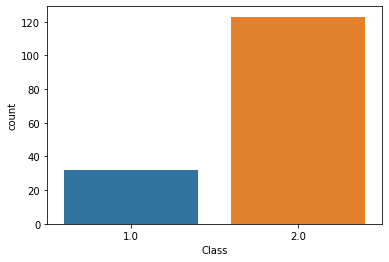

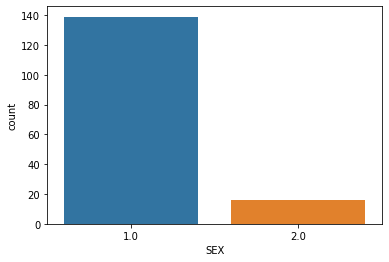

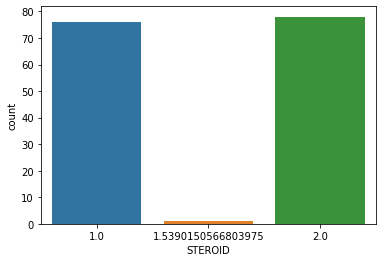

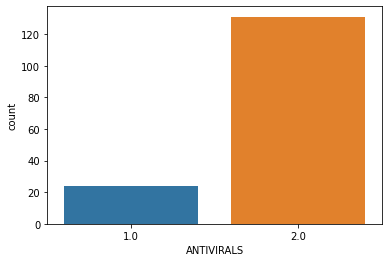

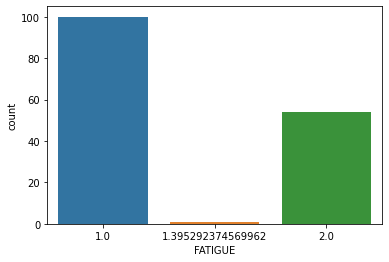

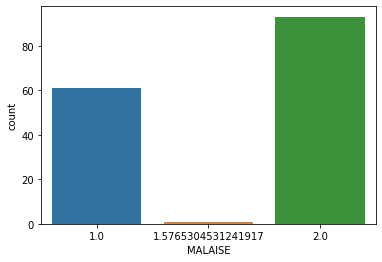

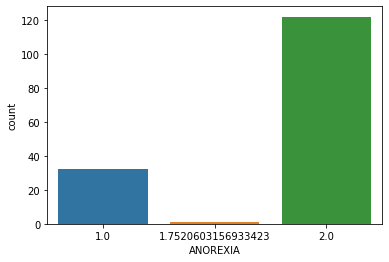

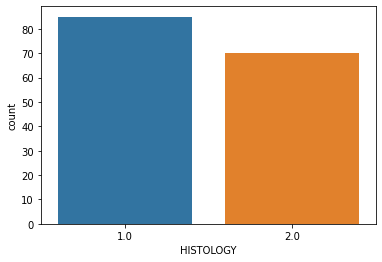

In [21]:
for i in uni_list:
    sns.countplot(data[i])
    plt.show()

From the visualizations we can see that, a value other than than 0 and 1 in the columns 'STEROID', 'FATIGUE', 'MALAISE', 'ANOREXIA'. 

Need to look in to these attributes and the other values, we cant remove that because of the sensitivity of the data.

In [88]:
data.STEROID.value_counts()

2    78
1    77
Name: STEROID, dtype: int64

In [22]:
data.FATIGUE.value_counts()

1.000000    100
2.000000     54
1.395292      1
Name: FATIGUE, dtype: int64

In [23]:
data.MALAISE.value_counts()

2.00000    93
1.00000    61
1.57653     1
Name: MALAISE, dtype: int64

In [24]:
data.ANOREXIA.value_counts()

2.00000    122
1.00000     32
1.75206      1
Name: ANOREXIA, dtype: int64

There is a singe different values in these 4 columns, It is decimal numbers(float)

We can covert it into 0 or 1 by changing its datatype from float into int

In [25]:
float_list = ['FATIGUE', 'MALAISE', 'ANOREXIA', 'STEROID']

In [26]:
for i in float_list:
    data[i] = data[i].astype(int)

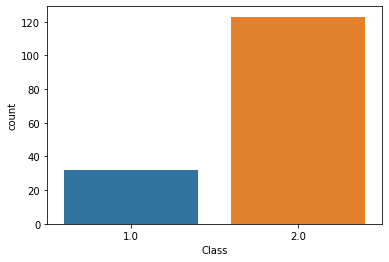

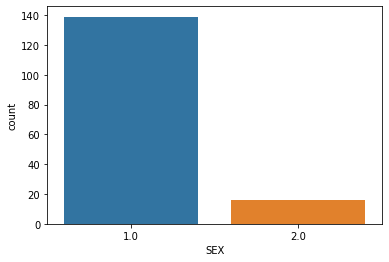

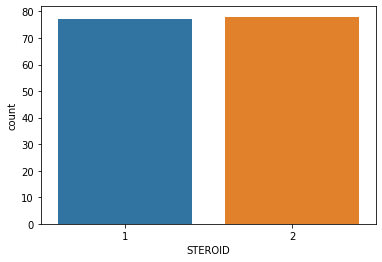

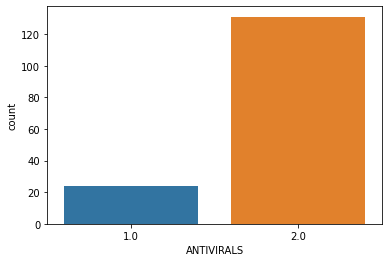

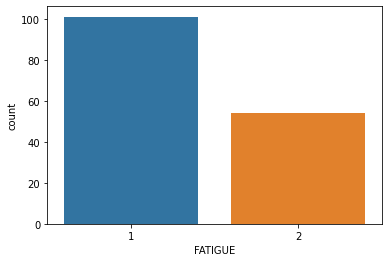

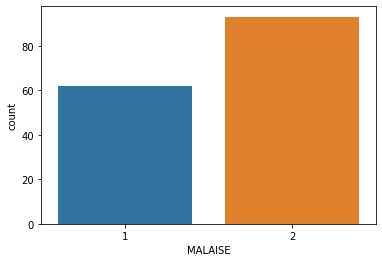

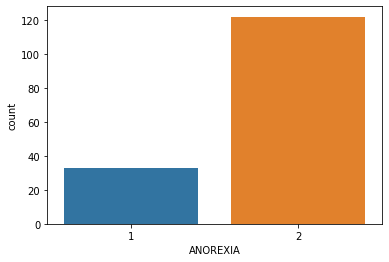

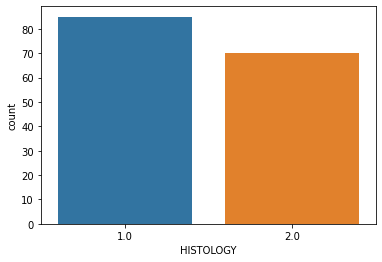

In [27]:
for i in uni_list:
    sns.countplot(data[i])
    plt.show()

###  Outlier reviews
#### We can't remove the outliers because of the sensitivity of data
#### Dataset relating to the life of a human

In [30]:
# Histograms
hist_plots = ['AGE', 'ALK_PHOSPHATE0', 'SGOT', 'ALBUMIN', 'PROTIME']

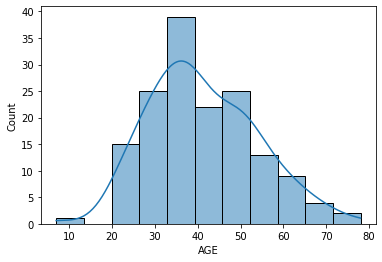

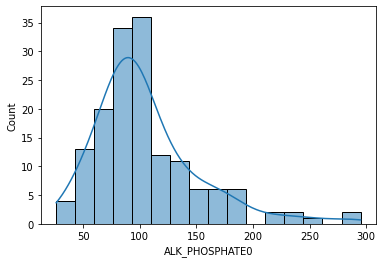

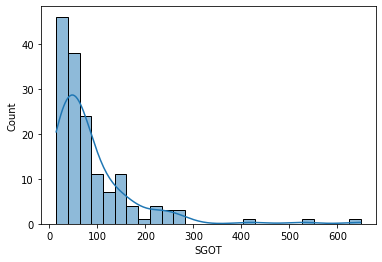

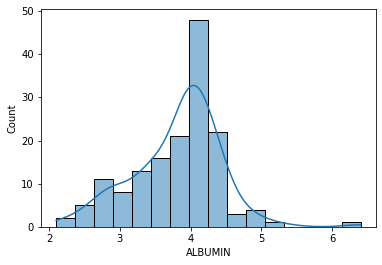

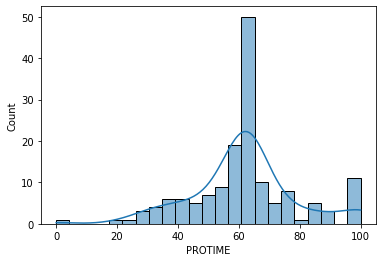

In [31]:
for i in hist_plots:
    sns.histplot(data[i], kde=True)
    plt.show()

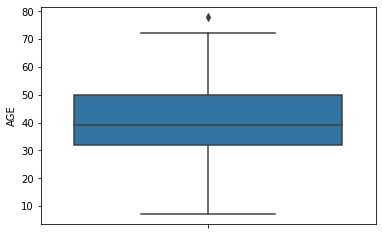

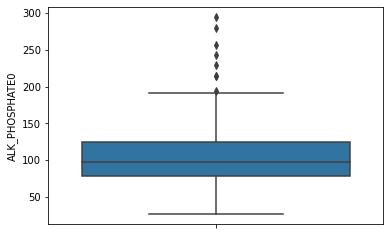

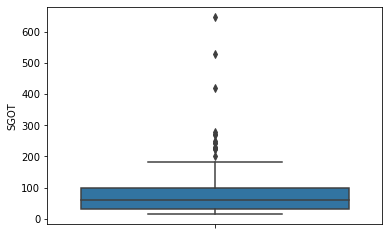

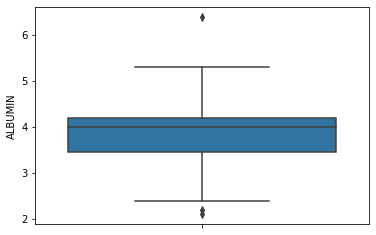

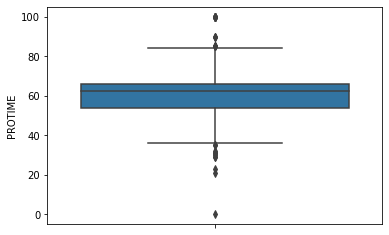

In [32]:
# Boxplots
for i in hist_plots:
    sns.boxplot(y=data[i])
    plt.show()

### Data Preprocessing

In [33]:
data.columns

Index(['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE',
       'ANOREXIA', 'LIVER_BIG', 'LIVER_FIRM', 'SPLEEN_PALPABLE', 'SPIDERS',
       'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK_PHOSPHATE0', 'SGOT', 'ALBUMIN',
       'PROTIME', 'HISTOLOGY'],
      dtype='object')

In [34]:
data = data[['AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE',
       'ANOREXIA', 'LIVER_BIG', 'LIVER_FIRM', 'SPLEEN_PALPABLE', 'SPIDERS',
       'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK_PHOSPHATE0', 'SGOT', 'ALBUMIN',
       'PROTIME', 'HISTOLOGY', 'Class']]

In [35]:
X = data.iloc[:,:-1].values
y = data.iloc[:, -1].values

In [37]:
X.shape, y.shape

((155, 19), (155,))

### Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = scalar.fit_transform(X)

### Splitting dataset into Train and Test set

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Model Selection

In [57]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [54]:
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix

In [67]:
Train_score = accuracy_score(y_train, classifier.predict(X_train))
print('The Training score with Logistic Regression Classifier is:', Train_score)
Test_score = accuracy_score(y_test, classifier.predict(X_test))
print('The Test score with Logistic Regression Classifier is:', Test_score)
cm_train = confusion_matrix(y_train, classifier.predict(X_train))
print('The Confusion matrix of Training set is:', cm_train)
cm_test = confusion_matrix(y_test, classifier.predict(X_test))
print('The Confusion matrix of Test set is:', cm_test)

The Training score with Logistic Regression Classifier is: 0.8879310344827587
The Test score with Logistic Regression Classifier is: 0.8974358974358975
The Confusion matrix of Training set is: [[14  8]
 [ 5 89]]
The Confusion matrix of Test set is: [[ 6  4]
 [ 0 29]]


In [69]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [70]:
Train_score = accuracy_score(y_train, tree.predict(X_train))
print('The Training score with Decision Tree Classifier is:', Train_score)
Test_score = accuracy_score(y_test, tree.predict(X_test))
print('The Test score with Decision Tree Classifier is:', Test_score)
cm_train = confusion_matrix(y_train, tree.predict(X_train))
print('The Confusion matrix of Training set is:', cm_train)
cm_test = confusion_matrix(y_test, tree.predict(X_test))
print('The Confusion matrix of Test set is:', cm_test)

The Training score with Decision Tree Classifier is: 1.0
The Test score with Decision Tree Classifier is: 0.8717948717948718
The Confusion matrix of Training set is: [[22  0]
 [ 0 94]]
The Confusion matrix of Test set is: [[ 7  3]
 [ 2 27]]


In [71]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
Train_score = accuracy_score(y_train, forest.predict(X_train))
print('The Training score with Random Forest Classifier is:', Train_score)
Test_score = accuracy_score(y_test, forest.predict(X_test))
print('The Test score with Random Forest Classifier is:', Test_score)
cm_train = confusion_matrix(y_train, forest.predict(X_train))
print('The Confusion matrix of Training set is:', cm_train)
cm_test = confusion_matrix(y_test, forest.predict(X_test))
print('The Confusion matrix of Test set is:', cm_test)

The Training score with Random Forest Classifier is: 1.0
The Test score with Random Forest Classifier is: 0.8461538461538461
The Confusion matrix of Training set is: [[22  0]
 [ 0 94]]
The Confusion matrix of Test set is: [[ 4  6]
 [ 0 29]]


In [73]:
from sklearn.neighbors import KNeighborsClassifier
neibhour = KNeighborsClassifier()
neibhour.fit(X_train, y_train)

KNeighborsClassifier()

In [74]:
Train_score = accuracy_score(y_train, neibhour.predict(X_train))
print('The Training score with KNN Classifier is:', Train_score)
Test_score = accuracy_score(y_test, neibhour.predict(X_test))
print('The Test score with KNN Classifier is:', Test_score)
cm_train = confusion_matrix(y_train, neibhour.predict(X_train))
print('The Confusion matrix of Training set is:', cm_train)
cm_test = confusion_matrix(y_test, neibhour.predict(X_test))
print('The Confusion matrix of Test set is:', cm_test)

The Training score with KNN Classifier is: 0.896551724137931
The Test score with KNN Classifier is: 0.7948717948717948
The Confusion matrix of Training set is: [[12 10]
 [ 2 92]]
The Confusion matrix of Test set is: [[ 3  7]
 [ 1 28]]


In [75]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [76]:
Train_score = accuracy_score(y_train, svc.predict(X_train))
print('The Training score with SVC Classifier is:', Train_score)
Test_score = accuracy_score(y_test, svc.predict(X_test))
print('The Test score with SVC Classifier is:', Test_score)
cm_train = confusion_matrix(y_train, svc.predict(X_train))
print('The Confusion matrix of Training set is:', cm_train)
cm_test = confusion_matrix(y_test, svc.predict(X_test))
print('The Confusion matrix of Test set is:', cm_test)

The Training score with SVC Classifier is: 0.9568965517241379
The Test score with SVC Classifier is: 0.8205128205128205
The Confusion matrix of Training set is: [[17  5]
 [ 0 94]]
The Confusion matrix of Test set is: [[ 3  7]
 [ 0 29]]


## Logisitic Regression Classification is the best algorithm for this dataset

### Prediction

In [77]:
lr = classifier.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [84]:
Pred_vs_act = pd.DataFrame({'Predicted':y_pred, 'Actual':y_test}).astype(int)
Pred_vs_act.replace({1:"DIE", 2:"LIVE"}, inplace=True)
Pred_vs_act

,Predicted,Actual
0,LIVE,LIVE
1,LIVE,LIVE
2,LIVE,LIVE
3,LIVE,DIE
4,LIVE,LIVE
5,LIVE,LIVE
6,LIVE,LIVE
7,DIE,DIE
8,LIVE,LIVE
9,DIE,DIE
